In [7]:
import numpy as np
import torch
import torch.nn as nn
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from src.neuralnetwork import *
from tqdm.notebook import tqdm
#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
y = np.array([[0]])

In [11]:
n = 100
backend = Aer.get_backend('qasm_simulator')
np.random.seed(42)

grad1_list_width = []
grad2_list_width = []
for i in tqdm(range(3, 20)):
    grad1 = 0
    grad2 = 0
    for j in tqdm(range(n), leave=False):    
        network = sequential([i, 1], backend, shots=10000)
        x = np.array([i*[np.pi/8]])
        network.backward(x, y)

        grad1 += np.mean(np.abs(network.weight_gradient_list[0][0]))
        grad2 += np.mean(np.abs(network.weight_gradient_list[0][-1]))
    
    grad1 /= n
    grad2 /= n
    grad1_list_width.append(grad1)
    grad2_list_width.append(grad2)

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

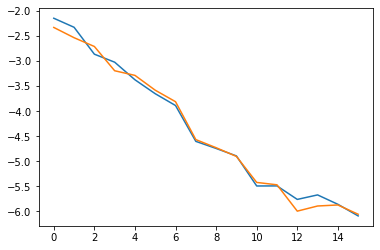

In [12]:
plt.plot(np.log(np.array(grad1_list_width)))
plt.plot(np.log(np.array(grad2_list_width)))
plt.show()

In [ ]:
n = 100
backend = Aer.get_backend('qasm_simulator')
np.random.seed(42)


grad_list_depth = []
for i in tqdm(range(1, 20)):
    grad = 0
    dim = [3] + i*[3] + [1]
    for j in tqdm(range(n), leave=False):
        
        network = sequential(dim, backend, shots=1000)
        network.backward(x, y)

        grad += np.abs(network.weight_gradient_list[0][0])
    
    grad /= n
    grad_list_depth.append(grad)

In [ ]:
plt.plot(grad_list_depth)
plt.show()

In [44]:
n = 10
backend = Aer.get_backend('qasm_simulator')
np.random.seed(42)

y = np.array([[0]])
grad_list_reps = []

for i in tqdm(range(3, 10)):
    x = np.array([i*[np.pi/8]])
    grad = 0
    for j in tqdm(range(n), leave=False):    
        network = sequential([i, 1], backend, reps = 3, shots = 10000)
        network.backward(x, y)
        grad += np.abs(network.weight_gradient_list[0])
    
    grad /= n
    grad_list_reps.append(grad)

In [40]:
grad_list_reps_sub = []
for i, j in enumerate(range(3, 10)):
    grad_list_reps_sub.append([grad_list_reps[i][0][0][0], grad_list_reps[i][0][j][0], grad_list_reps[i][0][2*j][0]])

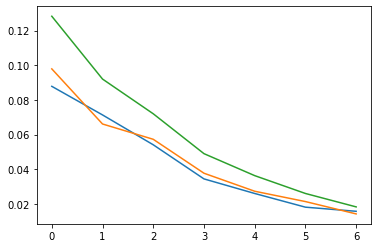

In [42]:
plt.plot(grad_list_reps_sub)
plt.show()